# Ford GoBike System Data Exploration
## by Omar Abuhassan

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()[0]
plt.style.use('fivethirtyeight')

%matplotlib inline

### loading the dataset and some exploration

In [3]:
df = pd.read_csv('fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### We have some problems in the data set 

1. Missing values in: start_station_id, start_station_longitude, end_station_latitude, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender.
2. Incorrectinig datatype: start_time, end_time, member_birth_year, member_gender. 

### Resolving issues:
1. We will drop the entries that have missing values since they will not affect the amount of data.
2. correct the datatypes of the named columns.

In [5]:
# drop entries with null values
df.dropna(inplace=True)

In [6]:
# correct datatypes
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.member_birth_year = df.member_birth_year.astype(int)
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### Extract needed features
1. Day of each entry
2. Hour of each entry
3. Age

In [8]:
# create days categorie type
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
day = pd.api.types.CategoricalDtype(ordered = True, categories = days)

# extract day from date column
df['day'] = df.start_time.dt.day_name().astype(day)

In [9]:
# extract hour from date column
df['start_hour'] = df.start_time.dt.hour

In [10]:
# extract age 
df['age'] = df.start_time.dt.year - df.member_birth_year

### saving the clean version

In [11]:
df.to_csv('fordgobike-tripdata_cleaned.csv', index=False)

### What is the structure of your dataset?

> It's consist of 174952 entries and 16 features.

### What is/are the main feature(s) of interest in your dataset?

> We will focus on duration_sec. Which is the time of the trip in seconds.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am wondering about hour in the day, age of the user, the type of the user, and the gender of the user. 

## Univariate Exploration


### What is the average duration of the trip ?

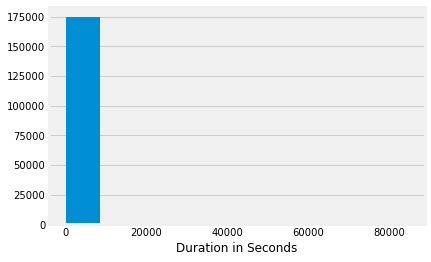

In [12]:
# start with basic histogram plot
plt.hist(data = df, x = 'duration_sec')
plt.xlabel('Duration in Seconds')
plt.grid(axis = 'x')

It seems there is an outlier

In [13]:
df.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

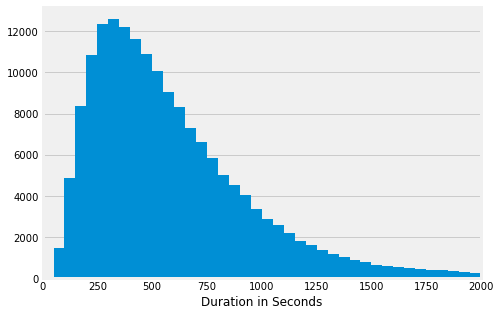

In [14]:
# Let's zoom-in 
binsize = 50
bins = np.arange(0, df.duration_sec.max()+binsize, binsize)

plt.figure(figsize=[7, 5])
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xlim(0, 2000)
plt.xlabel('Duration in Seconds')
plt.grid(axis = 'x')

As expected, the shape has long tail. We may scale it using log10.

In [15]:
np.log10(df.duration_sec.describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

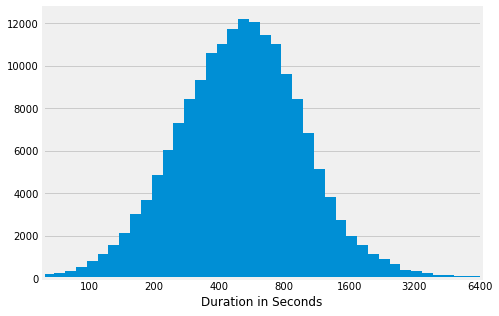

In [16]:
# log scale histogram 
binsize = 0.05
bins = 10 ** np.arange(1.79, 4.93+binsize, binsize)

plt.figure(figsize=[7, 5])
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([100, 200, 400, 800, 1600, 3200, 6400, 12800], [100, 200, 400, 800, 1600, 3200, 6400, 12800])
plt.xlim((61, 6500))
plt.xlabel('Duration in Seconds')
plt.grid(axis = 'x')

After log scale, we can see that the data is normally distributed with one peak. 

### What is the distribution of trips in terms of days?

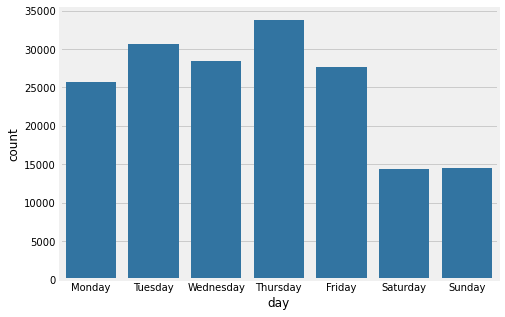

In [17]:
# start with basic histogram plot
plt.figure(figsize=[7, 5])
sb.countplot(data=df, x='day', color=color);

We can say that there are less users in weekends.

### What is the distribution of trips in terms of hours?

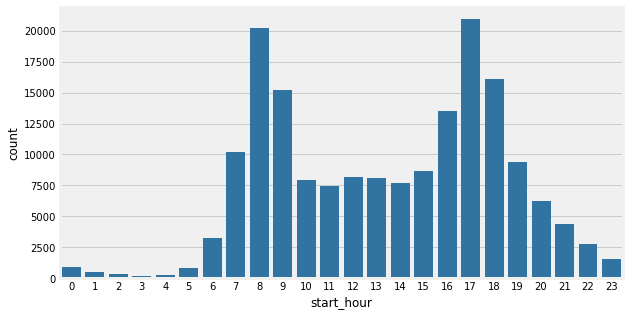

In [18]:
plt.figure(figsize=[9, 5])
sb.countplot(data=df, x='start_hour', color = color);

We can see that the data is bimodal distributed. It seems our users use the bikes as transportation to their jobs.

### What is the average age of the users?

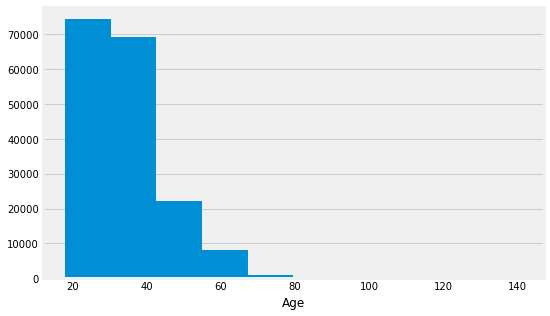

In [19]:
# start with basic histogram plot
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'age')
plt.xlabel('Age')
plt.grid(axis ='x')

It seems there is an outlier

In [20]:
df.age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

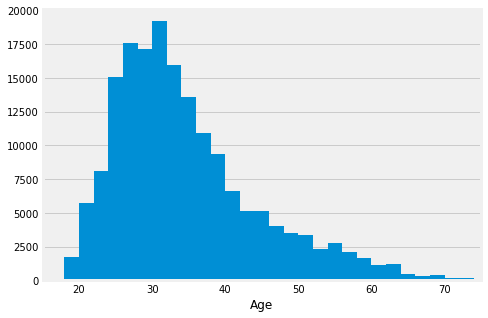

In [21]:
# Let's zoom-in
binsize = 2
bins = np.arange(18, df.age.max()+binsize, binsize)

plt.figure(figsize=[7, 5])
plt.hist(data = df, x = 'age', bins=bins)
plt.xlabel('Age')
plt.xlim(15, 75)
plt.grid(axis ='x')

As expected, the shape has long tail. We may scale it using log10.

In [22]:
np.log10(df.age.describe())

count    5.242919
mean     1.533986
std      1.005126
min      1.255273
25%      1.431364
50%      1.505150
75%      1.591065
max      2.149219
Name: age, dtype: float64

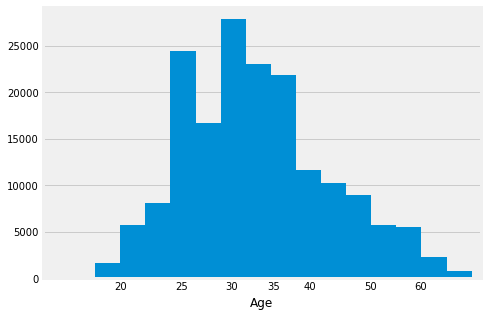

In [23]:
# log scale histogram 
binsize = 0.04
bins = 10 ** np.arange(1.26, 2.15+binsize, binsize)

plt.figure(figsize=[7, 5])
plt.hist(data = df, x = 'age', bins=bins)
plt.xlabel('Age')
plt.xscale('log')
plt.xticks([20, 25, 30,35, 40, 50, 60,80], [20, 25, 30,35, 40, 50, 60,80])
plt.xlim(15, 75)
plt.grid(axis ='x')

After log scale, we can see that the data is slitly normally distributed with two peaks and right-skewed. 

### What is the percentage of each gender of the users?

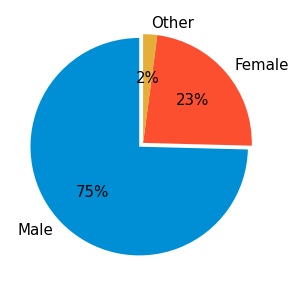

In [24]:
# plot the pie chart
sorted_counts = df.member_gender.value_counts()

plt.subplots(figsize=(7,5))
plt.pie(sorted_counts, explode = (0.05, 0, 0), labels = sorted_counts.index, autopct = '%1.0f%%',
        startangle=90,textprops={'fontsize': 15});

Males are the majority of the users with 75%, then Females with 23%, then Others with 2%.

### What is the percentage of each type of the users?

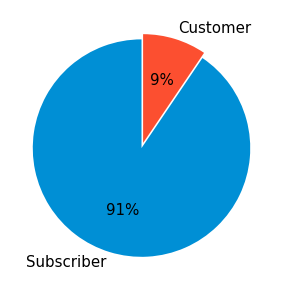

In [25]:
# plot the pie chart
sorted_counts = df.user_type.value_counts()

plt.subplots(figsize=(7,5))
plt.pie(sorted_counts, explode = (0.05, 0), labels = sorted_counts.index, autopct = '%1.0f%%',
         startangle = 90,textprops = {'fontsize': 15});

Subscriber is the majority of the users with 91%.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As we discuss earlier, we found outliers in duration_sec and we solved the issue using log transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We also saw that age valriable has long tail and after log transformation the data become more clearer as bimodal distribution. 

## Bivariate Exploration


In [26]:
# Mask to delete outliers
from scipy import stats
def delete_outliers(df):
    if isinstance(df, pd.Series):
        df = df.to_frame()
    z = np.abs(stats.zscore(df))
    delete_outliers = (z < 3).all(axis=1)
    return delete_outliers

### When users takes long trip in terms of hour of a day?

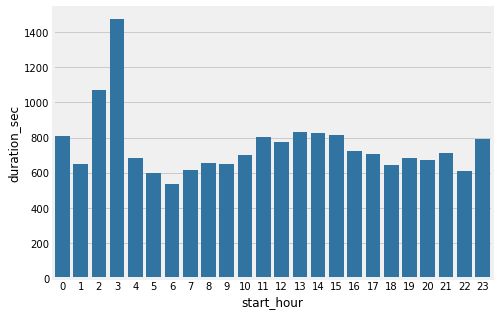

In [27]:
with plt.rc_context({'lines.linewidth': 1.5}):
    mean = df.groupby('start_hour')['duration_sec'].mean()
    plt.subplots(figsize=(7, 5)) 
    sb.barplot(x = mean.index, y = mean, color = color)

Seems that the user takes long trip if he/she starts the trip at 3 AM. However, let's check that after we delete the outliers.

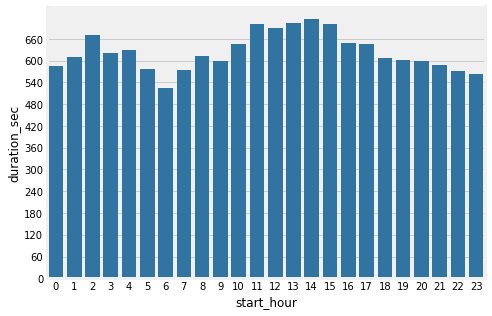

In [28]:
clear_df = df[delete_outliers(df.duration_sec)]

with plt.rc_context({'lines.linewidth': 1.5}):
    mean = clear_df.groupby('start_hour')['duration_sec'].mean()
    plt.subplots(figsize=(7, 5)) 
    plt.yticks(np.arange(0, 701, 60))
    sb.barplot(x = mean.index, y = mean, color = color)

There is a big difference, average user takes long trip if he/she starts the trip between 11 AM and 4 PM.

### What is relationship between age and duration of the trip?

In [29]:
bin_edges = np.arange(df.age.min(), df.age.max() + 3, 3)
bin_centers = bin_edges[:-1] 

age_binned = pd.cut(df.age, bin_edges, include_lowest = True)
mean = df.duration_sec.groupby(age_binned).mean()

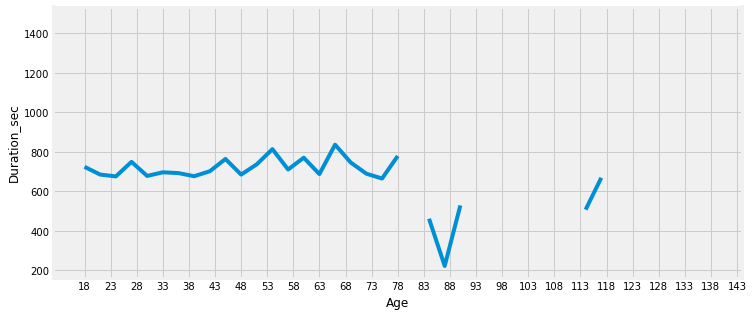

In [30]:
plt.subplots(figsize=(11, 5)) 
plt.errorbar(x = bin_centers, y = mean)
plt.xlabel('Age')
plt.ylabel("Duration_sec")
plt.xticks(np.arange(df.age.min(), df.age.max() + 5, 5));

There are gaps in the line, let's plot it again after deleting outliers.

In [42]:
clean_df = df[delete_outliers(df[['duration_sec', 'age']])]

In [43]:
bin_edges = np.arange(clean_df.age.min(), clean_df.age.max() + 3, 3)
bin_centers = bin_edges[:-1] 

age_binned = pd.cut(clean_df.age, bin_edges, include_lowest = True)
mean = clean_df.duration_sec.groupby(age_binned).mean()

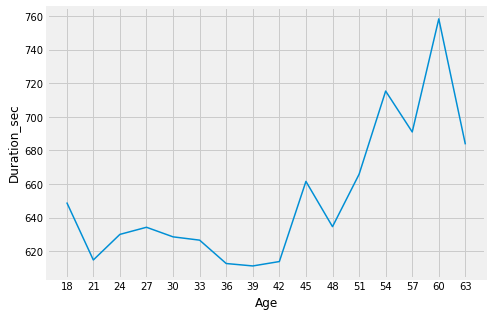

In [44]:

with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize = (7, 5)) 
    plt.xlabel('Age')
    plt.ylabel("Duration_sec")
    plt.errorbar( x = bin_centers, y = mean);
    plt.xticks(np.arange(18, bin_centers.max()+ 1, 3))

There is a big difference, it seems that users with age between 45 and 63 having longer trips.

### What is relationship between gender and types of users ?

In [33]:
count_type_gender = df.groupby(['member_gender', 'user_type']).size().reset_index(name="count")

In [34]:
subscriber_gender = count_type_gender.query('user_type == "Subscriber"')

customer_gender = count_type_gender.query('user_type == "Customer"')

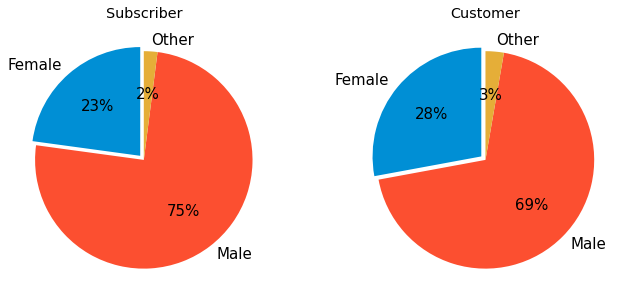

In [35]:
plt.subplots(figsize=(10, 5)) 

plt.subplot(1, 2, 1)
plt.title('Subscriber')
plt.pie(subscriber_gender['count'], explode = (0.05, 0, 0), labels = subscriber_gender.member_gender, autopct = '%1.0f%%',
        startangle=90, textprops={'fontsize': 15});

plt.subplot(1, 2, 2)
plt.title('Customer')
plt.pie(customer_gender['count'], explode = (0.05, 0, 0), labels = customer_gender.member_gender, autopct = '%1.0f%%',
         startangle=90, textprops={'fontsize': 15});

They are quit similar. However, there are little more male subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  We found that users may have longer trip when they start between 11 AM and 4 PM. Moreover, users with age between 45 and 63 usually use bike longer that other ages.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We found that males are more likley to subscribe with our servecies than females.

## Multivariate Exploration


### Is there a diffrence between user type in tearms of average age and  starting hour ?

In [36]:
clean_df = df[delete_outliers(df.age)]

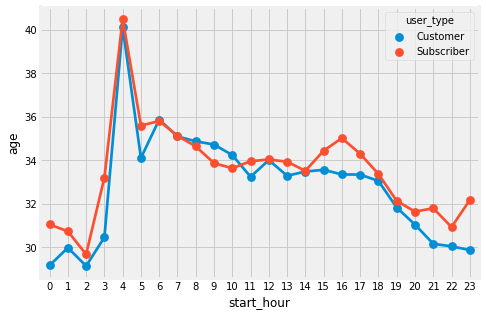

In [37]:
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize = (7, 5)) 
    age_hours_user = clean_df.groupby(['user_type','start_hour'])['age'].mean().reset_index(name="age")
    sb.pointplot(data = age_hours_user, x='start_hour', y='age', hue='user_type')
    plt.grid(axis='x');

It seems that Custromers and Subscribers have almost the same average age in terms of start trip hour

### Is there a diffrence between genders in tearms of average duration and  age ?

In [38]:
clean_df = df[delete_outliers(df[['duration_sec', 'age']])]
means = clean_df.groupby(['member_gender', age_binned])['duration_sec'].mean().reset_index(name="duration")
bin_centers = bin_edges[:-1] 
means['age_centers'] = np.tile(bin_edges[:-1], 3)

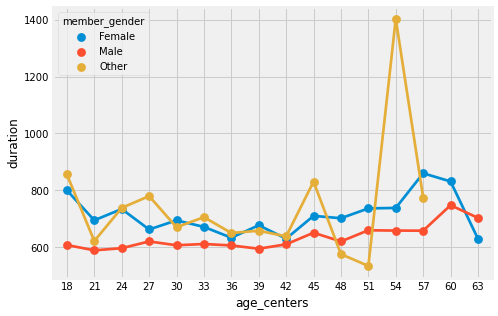

In [39]:
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize = (7, 5)) 
    sb.pointplot(data = means, x = 'age_centers', y = 'duration', hue = 'member_gender');
    plt.grid(axis = 'x')

We can see that generally females using bike more thean males. Moreover, both Males and Females have stable duration trip time with slightly inceasing when they are between age 48 and 60. However, I think because of small sample of Others the line is not that stable.

### What is combination of user type and gender has the highest duration average ?

In [248]:
clean_df = df[delete_outliers(df.duration_sec)]

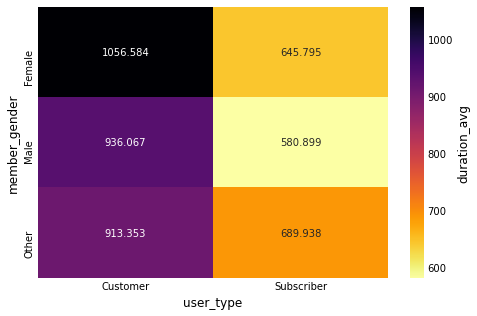

In [249]:
plt.figure(figsize=[7, 5])
means = clean_df.groupby(['user_type', 'member_gender'])['duration_sec'].mean()
means = means.reset_index(name = 'duration_sec')
means = means.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'duration_sec')
sb.heatmap(means, annot = True, fmt = '.3f', cmap='inferno_r',
           cbar_kws = {'label' : 'duration_avg'});

As shown, female customers have the highest average time trip and male subscribers have the lowest one.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We found that female customers have the highest average time trip which is 1056 seconds and male subscribers have the lowest one which is 580 seconds. Indeed, generally customers with age between 48 and 60 have the highest duration average.  

### Were there any interesting or surprising interactions between features?

> We found that there is no big different between customers and subscribers in terms of start time.